In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os

#### Concatenating All smaller Data Files into One Data File

In [2]:
files = [file for file in os.listdir('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
data = pd.DataFrame()     # Creating an empty dataframe 
for file in files:
    df = pd.read_csv('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)     # reading all files location
    data = pd.concat([data, df])    # Concatenating them into the basic DataFrame
data.to_csv('AllData.csv', index=False)     # Indexing false means the first integer index values of the dataframe 

In [3]:
data = pd.read_csv('AllData.csv')
datacopy = data.copy()      # If data gets too modified we can use the datacopy method
data.shape     # 186850 x 6

(186850, 6)

#### Data Pre-Processing and Solving to make it ready to use..

In [4]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [ ]:
data['Month'] = data['Order Date'].str[0:2]    # Using the string property and slicing the first two characters
data = data.dropna()
data.head()        # Generating the first three columns of the dataframe

In [ ]:
# We first remove the null month values
temp = data[data['Order Date'].str[0:2] == 'Or']
temp.head(3)

In [7]:
data = data[data['Order Date'].str[0:2] != 'Or']

In [8]:
data['Month'] = data['Month'].astype('int32')     # Converting from string to integer data type
data.shape       # 185950 x 7

(185950, 7)

In [9]:
data['Price Each'] = pd.to_numeric(data['Price Each'])    
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['sales'] = data['Price Each'] * data['Quantity Ordered']   
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


#### What was the best Sales Month from the data and how much worth was it for ?

In [10]:
data.shape       # 185950 x 8

(185950, 8)

In [11]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales'],
      dtype='object')

In [12]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [13]:
data['Month'] = pd.DatetimeIndex(data['Order Date']).month
data['Month'].shape      # 185950 x 1

(185950,)

In [14]:
month_file = data.groupby('Month')[['Price Each', 'Quantity Ordered', 'sales']].sum()
month_file.tail(3)

,Price Each,Quantity Ordered,sales
Month,,,
10,3715554.83,22703,3736726.88
11,3180600.68,19798,3199603.20
12,4588415.41,28114,4613443.34


In [15]:
# We will first convert float values to integer values for both 'Price Each' and 'sales' column
month_file['Price Each'] = month_file['Price Each'].astype('int32')
month_file['sales'] = month_file['sales'].astype('int32')
month_file.tail(3)

,Price Each,Quantity Ordered,sales
Month,,,
10,3715554,22703,3736726
11,3180600,19798,3199603
12,4588415,28114,4613443


In [16]:
# Now we divide Cost Revenue of month 'Price Each' by 100000 for visualization purposes
file1 = pd.DataFrame()
file1['Cost Revenue'] = month_file['Price Each'] / 10000  # In Ten Thousand

In [17]:
file1['Quantity'] = month_file['Quantity Ordered'] / 1000    # In Thousand
file1['Sales of Month'] = month_file['sales'] / 10000        # In Ten Thousand

In [18]:
file1.head(3)

,Cost Revenue,Quantity,Sales of Month
Month,,,
1,181.1768,10.903,182.2256
2,218.8884,13.449,220.2022
3,279.1207,17.005,280.7100


In [19]:
file1 = file1.astype('int32')
file1.shape       # 12 x 3 (data of 12 months)

(12, 3)

In [20]:
mon = np.arange(1, 13, 1)
sls = np.array(file1['Sales of Month'])
qty = np.array(file1['Quantity'])
cre = np.array(file1['Cost Revenue'])

In [21]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = [182, 220, 280, 339, 315, 257, 264, 224, 209, 373, 319, 461]

Text(0.5, 1.0, 'Monthly Sales')

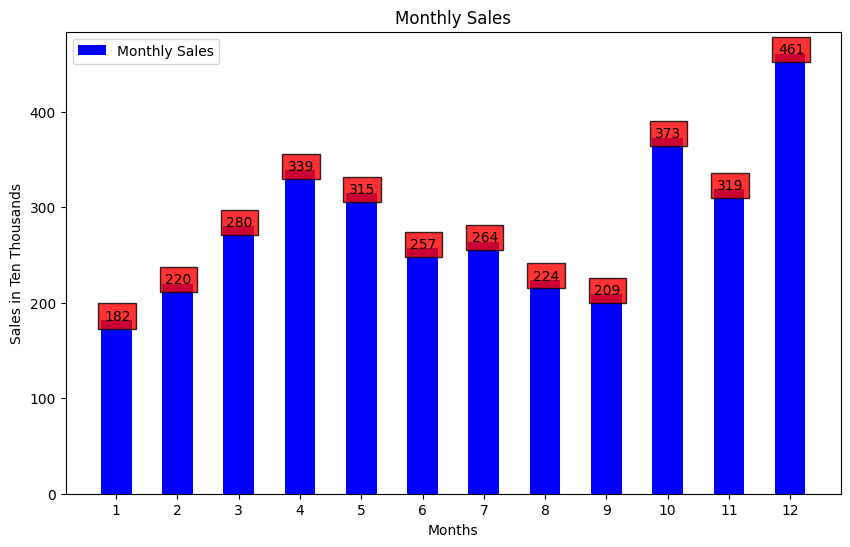

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(mon, sls, color='blue', alpha=1, width=0.5)
plt.xlabel('Months')
plt.xticks(mon)
for i in range(len(mon)):
    # i value to change x axis and y[i] value to change y axis
    plt.text(i+0.8, y[i], y[i], ha='left', bbox = dict(facecolor='red', alpha=0.8))
plt.ylabel('Sales in Ten Thousands')
plt.legend(['Monthly Sales'])
plt.title('Monthly Sales')

In [23]:
# The maximum Sales of the Month were in December
print("The Maximum Sales were in December : ",month_file['sales'][12])

The Maximum Sales were in December :  4613443


#### Thus the best Sales Month was of December and the Total Sales were 46,13,443

#### Which City had highest number of Sales ?

In [24]:
data.shape

(185950, 8)

In [25]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales'],
      dtype='object')

In [26]:
data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1])      # The lambda data type creates a user defined function and performs it on the entire column sequence
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [27]:
city_file = pd.DataFrame()
city_file['sales'] = data.groupby('City')['sales'].sum()
city_file['sales'] = city_file['sales'].astype('int32')
city_file

,sales
City,
Atlanta,2795498
Austin,1819581
Boston,3661642
Dallas,2767975
Los Angeles,5452570
New York City,4664317
Portland,2320490
San Francisco,8262203
Seattle,2747755


In [28]:
sls1 = np.array(city_file['sales'])
sls1 = sls1 / 100000
sls1 = sls1.astype('int32')
cty = np.array(['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle'])

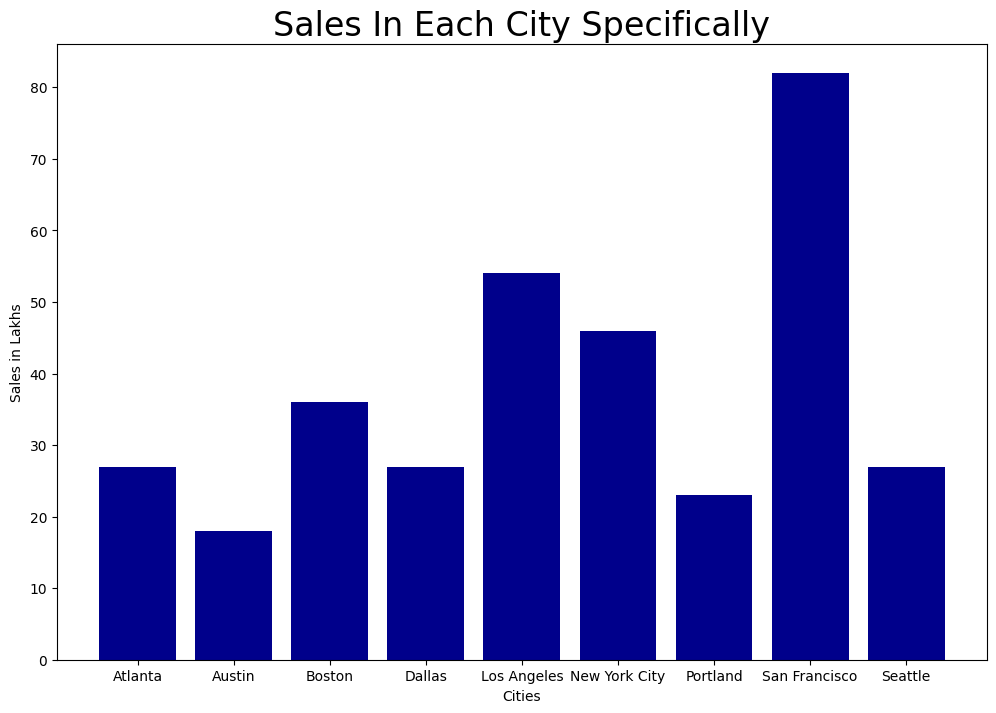

In [92]:
plt.figure(figsize=(12, 8))
plt.bar(cty, sls1, color='darkblue')
plt.ylabel('Sales in Lakhs')
plt.xlabel('Cities')
plt.title("Sales In Each City Specifically",fontsize=24)
plt.show()

In [30]:
# Thus San Francisco gave the highest Sales 
print("The Sales of San Francisco are the highest : ",city_file['sales'][7])

The Sales of San Francisco are the highest :  8262203


#### The Highest Sales were in the City San Francisco which were 82,62,203

#### What time should we display advertisements to maximize likelihood of customer's buying product?

In [31]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [32]:
data['Hour'] = pd.DatetimeIndex(data['Order Date']).hour
data['Minute'] = pd.DatetimeIndex(data['Order Date']).minute
data['Count'] = 1
data.shape

(185950, 12)

In [33]:
time = pd.DataFrame()
time = data[['Hour', 'Minute', 'Count', 'sales']]

(185950, 3)

In [34]:
time_hourly = pd.DataFrame()
time_hourly['Hour_time'] = time.groupby('Hour')['sales'].sum()
time_hourly['Hour_time'] = time_hourly['Hour_time'].astype('int32')
time_hourly.head(3)

,Hour_time
Hour,
0,713721
1,460866
2,234851


In [35]:
time_hourly['Hour_time'] = time_hourly['Hour_time'] / 10000        # In Ten Thousand
time_hourly['Hour_time'] = time_hourly['Hour_time'].astype('int32')

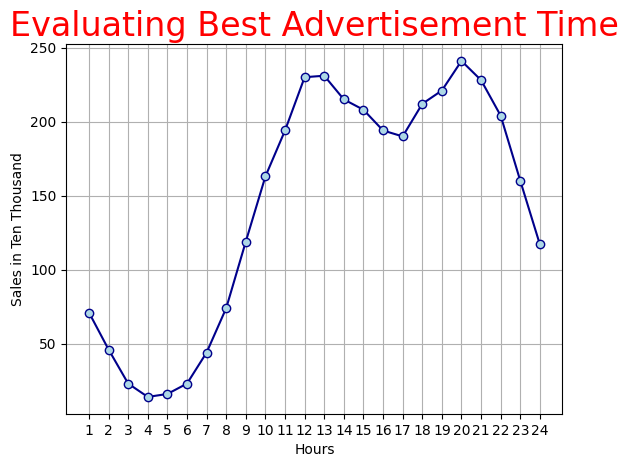

In [94]:
hr  = []
# The best hour for advertising will be when we have maximum sales for we will be having many customers active or online...
for i in range(1, 25):
    hr.append(i)
plt.plot(hr, time_hourly['Hour_time'], color='darkblue', marker='o', markerfacecolor='lightblue')
plt.xticks(hr)
plt.xlabel('Hours')
plt.ylabel('Sales in Ten Thousand')
plt.grid()
plt.title("Evaluating Best Advertisement Time", fontsize=24, color='red')
plt.show()

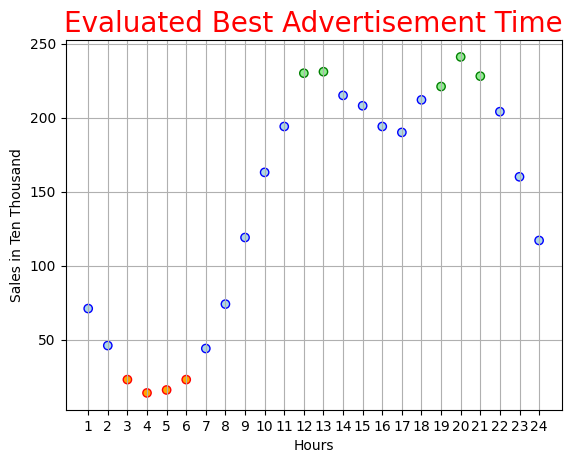

In [95]:
col = []
fcol = []
for i in range(1, 25):
    if i == 12 or i == 13 or i == 19 or i == 20 or i == 21:
        col.append('green')
        fcol.append('lightgreen')
    elif i == 3 or i == 4 or i == 5 or i == 6:
        col.append('red')
        fcol.append('orange')
    else:
        col.append('blue')
        fcol.append('lightblue')
plt.scatter(hr, time_hourly['Hour_time'], color=col, facecolor=fcol)     # Passing colored values as list for the required colors
plt.xticks(hr)
plt.xlabel('Hours')
plt.ylabel('Sales in Ten Thousand')
plt.title("Evaluated Best Advertisement Time",fontsize=20, color='red')
plt.grid()
plt.show()

#### Thus the best advertisement time is between 12:00 noon to 1:00 pm and from 7:00pm to 9:00 pm. Also the worst advertisement time is between 3:00 am to 6:00 am in morning.

#### Which Item was mostly sold ?

In [56]:
items = pd.DataFrame()
items['Sales_Value'] = data.groupby('Product')['sales'].sum()
items.shape

(19, 1)

In [57]:
items

,Sales_Value
Product,
20in Monitor,454148.71
27in 4K Gaming Monitor,2435097.56
27in FHD Monitor,1132424.50
34in Ultrawide Monitor,2355558.01
AA Batteries (4-pack),106118.40
AAA Batteries (4-pack),92740.83
Apple Airpods Headphones,2349150.00
Bose SoundSport Headphones,1345565.43
Flatscreen TV,1445700.00


In [58]:
items['Sales_Value'] = items['Sales_Value'].astype('int32')

In [63]:
items['Product'] = data['Product'].unique()
x = np.array(items['Product'].str[0:8])
print(x.size)

19


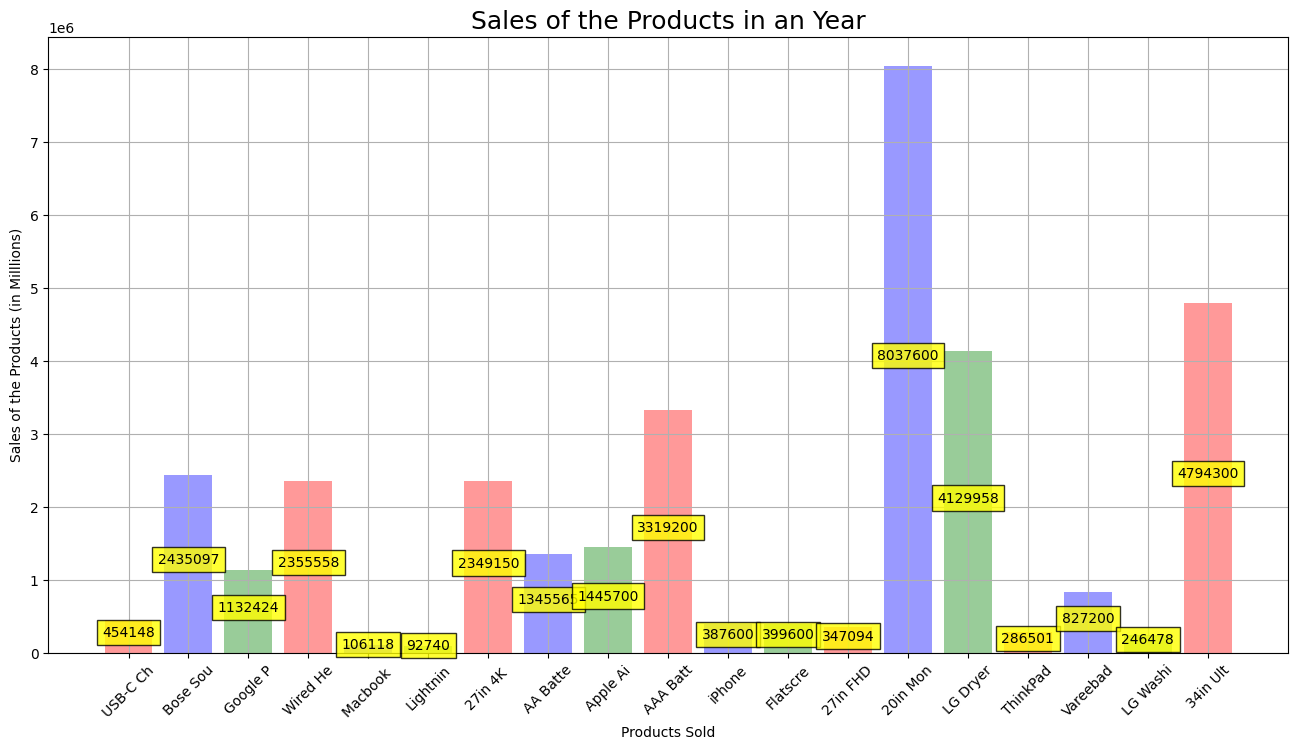

In [96]:
col1 = ['red', 'blue', 'green']
y = np.array(items['Sales_Value'])
plt.figure(figsize=(16, 8))
plt.bar(x, y, color=col1, alpha=0.4)
plt.grid()
for j in range(len(x)):
    plt.text(j, y[j]//2, y[j], ha='center', bbox=dict(facecolor='yellow', alpha=0.8))
plt.xticks(x, rotation=45)
plt.xlabel('Products Sold')
plt.ylabel('Sales of the Products (in Milllions)')
plt.title("Sales of the Products in an Year",fontsize=18,fontweight=100)
plt.show()

#### Thus the Best Product was of 20 Inches Monitor which gave the best Sales of 80,37,600 USD